In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [3]:
from pmdarima.arima import auto_arima

In [4]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
from scipy.stats import *
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import datetime
from datetime import timedelta



In [5]:

df = pd.read_csv('Telkom.csv')

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,3750.0,3790.0,3690.0,3770.0,3249.883301,272812700
1,2019-01-08,3770.0,3860.0,3730.0,3850.0,3318.845947,478130500
2,2019-01-15,3860.0,4050.0,3850.0,4030.0,3474.012939,460955700
3,2019-01-22,4000.0,4010.0,3730.0,3780.0,3258.503418,531602600
4,2019-01-29,3780.0,3930.0,3780.0,3780.0,3258.503418,464647400
...,...,...,...,...,...,...,...
174,2022-05-03,4560.0,4560.0,4300.0,4310.0,4157.917480,343682000
175,2022-05-10,4120.0,4480.0,4120.0,4260.0,4109.681641,860249400
176,2022-05-17,4250.0,4290.0,4070.0,4110.0,3964.974609,807191200
177,2022-05-24,4120.0,4340.0,4120.0,4250.0,4100.034668,612416700


In [6]:
df = df[['Date','Close']]
df

,Date,Close
0,2019-01-01,3770.0
1,2019-01-08,3850.0
2,2019-01-15,4030.0
3,2019-01-22,3780.0
4,2019-01-29,3780.0
...,...,...
174,2022-05-03,4310.0
175,2022-05-10,4260.0
176,2022-05-17,4110.0
177,2022-05-24,4250.0


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True) 
df['Close']=df['Close'].astype(float)
df

,Close
Date,
2019-01-01,3770.0
2019-01-08,3850.0
2019-01-15,4030.0
2019-01-22,3780.0
2019-01-29,3780.0
...,...
2022-05-03,4310.0
2022-05-10,4260.0
2022-05-17,4110.0


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 179 entries, 2019-01-01 to 2022-05-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   179 non-null    float64
dtypes: float64(1)
memory usage: 2.8 KB


<AxesSubplot:xlabel='Date'>

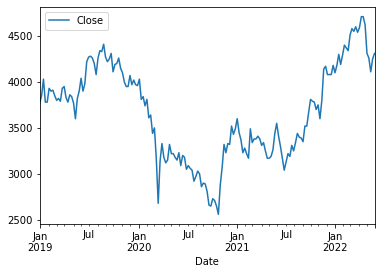

In [8]:
df.info()
df.plot()


In [9]:
print(df.shape)
train=df.iloc[:len(df)-35]
test=df.iloc[len(df)-35:]
print(train.shape,test.shape)


(179, 1)
(144, 1) (35, 1)


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,179.0,3664.581006,507.912912,2560.0,3230.0,3740.0,4080.0,4710.0


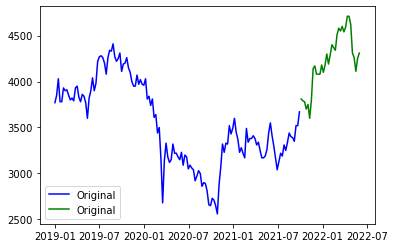

In [11]:
plt.plot(train, color = 'blue', label = 'Original')
plt.plot(test, color = 'green', label = 'Original')
plt.legend(loc = 'best')
plt.show()


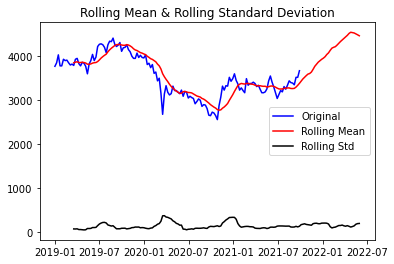

In [12]:
rolling_mean = df.rolling(window = 12).mean()
rolling_std = df.rolling(window = 12).std()
plt.plot(train, color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

<Figure size 432x288 with 0 Axes>

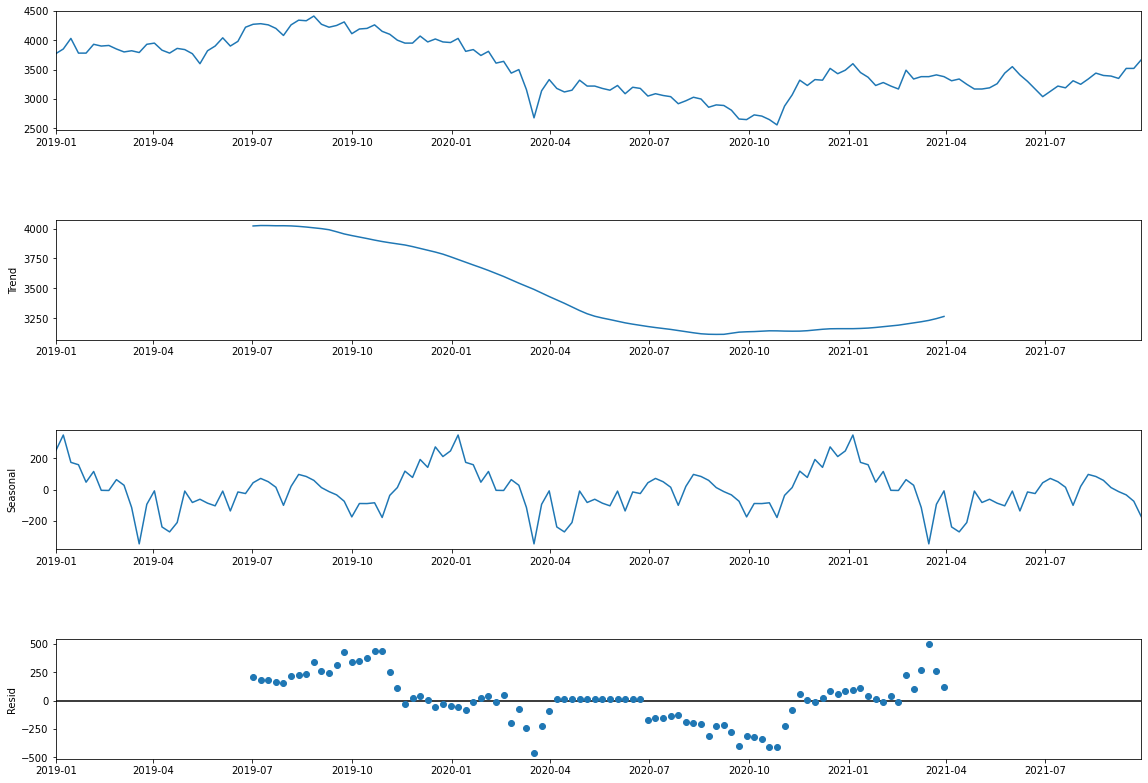

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train, model='addictive')

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(18, 12)

In [14]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(train['Close'])

In [15]:
#tes stasioner

print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -1.6900026688005318
p-value: 0.43627062416212903
Critical Values:
	1%: -3.4769274060112707
	5%: -2.8819726324025625
	10%: -2.577665408088415


In [16]:
train['1diff'] = train['Close'] - train['Close'].shift(1)
train['2diff'] = train['1diff'] - train['1diff'].shift(1)

In [17]:
result=adfuller(train['1diff'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -12.811409163767113
p-value: 6.434680627287829e-24
Critical Values:
	1%: -3.477261624048995
	5%: -2.8821181874544233
	10%: -2.5777431104939494


In [18]:
result=adfuller(train['2diff'].dropna())
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -7.0870946196074405
p-value: 4.508985638753885e-10
Critical Values:
	1%: -3.480118600110386
	5%: -2.8833618426136196
	10%: -2.578407034974382


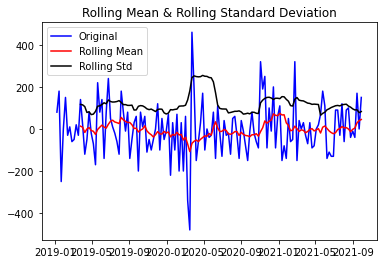

In [19]:
rolling_mean = train['1diff'].rolling(window = 12).mean()
rolling_std = train['1diff'].rolling(window = 12).std()
plt.plot(train['1diff'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

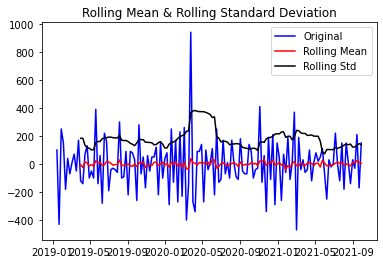

In [20]:
rolling_mean = train['2diff'].rolling(window = 12).mean()
rolling_std = train['2diff'].rolling(window = 12).std()
plt.plot(train['2diff'], color = 'blue', label = 'Original')
plt.plot(rolling_mean, color = 'red', label = 'Rolling Mean')
plt.plot(rolling_std, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Rolling Standard Deviation')
plt.show()

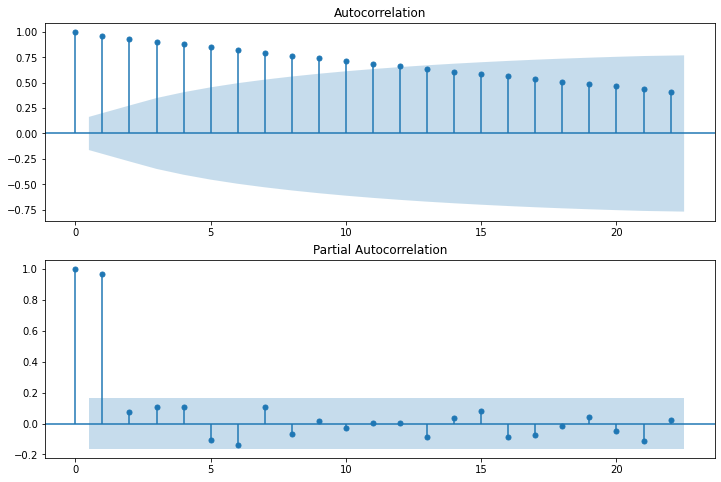

In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Close'], ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Close'], ax=ax2, )

In [22]:
from statsmodels.tsa.stattools import acf
print(acf(train['Close']))

[ 1.          0.96031199  0.92697956  0.90097919  0.88108958  0.85316304
  0.81798888  0.79310338  0.76647355  0.7410455   0.712037    0.68621872
  0.66280427  0.63388634  0.60889621  0.58895963  0.56603183  0.53794467
  0.51039721  0.49055623  0.46821704  0.43844592  0.41129207  0.38658528
  0.36237629  0.33075181  0.30685504  0.28362448  0.25138246  0.21043972
  0.17360568  0.14528785  0.11582723  0.0795734   0.03892088  0.00850825
 -0.0148712  -0.04186111 -0.06504888 -0.08144586 -0.09794195]


In [23]:
from statsmodels.tsa.stattools import pacf
print(pacf(train['Close']))

[ 1.          0.96702746  0.07544964  0.10441516  0.10499973 -0.10792502
 -0.13823472  0.10929629 -0.06631476  0.01363031 -0.02763888  0.00576808
  0.00366768 -0.08881152  0.03760424  0.08381892 -0.08858517 -0.07323202
 -0.01262118  0.04310602 -0.04836152 -0.11378585  0.02312595 -0.03808422
 -0.05546193 -0.0969467   0.11353791 -0.05984475 -0.21561852 -0.21281255
 -0.03095986 -0.00919767  0.00116088 -0.09784022 -0.19982114  0.00777659
  0.11049765 -0.01676988  0.09825077  0.12021114 -0.04356758]


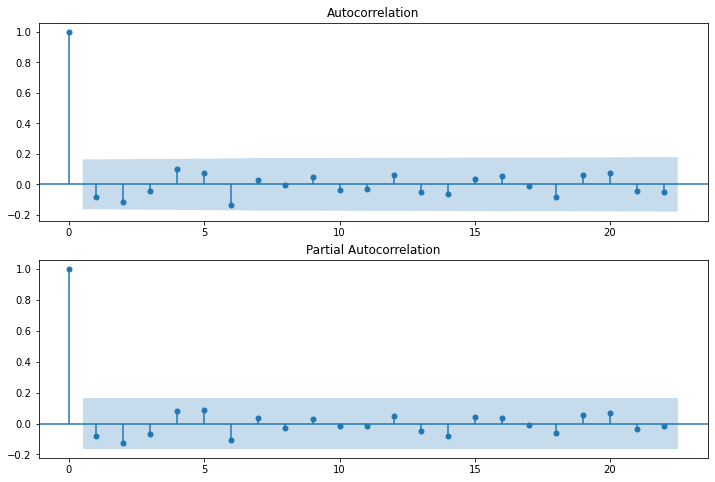

In [36]:
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['1diff'].dropna(), ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['1diff'].dropna(), ax=ax2, )

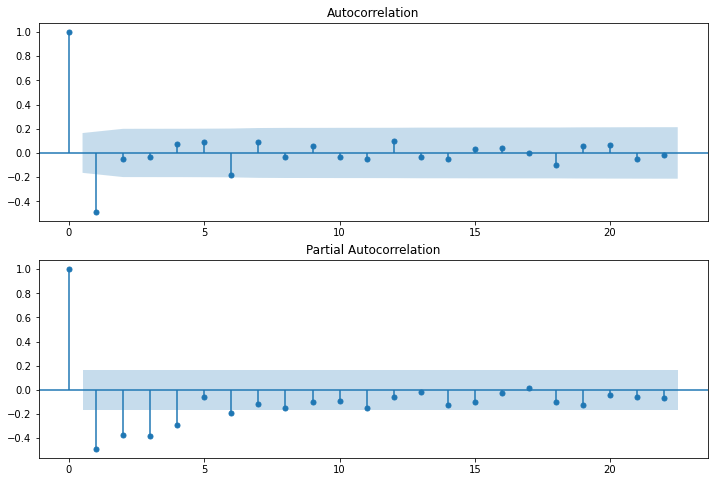

In [24]:
#acf & pacf sebelum differencing
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['2diff'].dropna(), ax=ax1, )
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['2diff'].dropna(), ax=ax2, )

In [25]:
from statsmodels.tsa.stattools import acf
print(acf(train['2diff'].dropna()))

[ 1.         -0.48468228 -0.04732986 -0.03089208  0.07511148  0.0906788
 -0.17819515  0.09111824 -0.0342523   0.05660094 -0.03665714 -0.04659849
  0.09607864 -0.03574452 -0.05266702  0.03526622  0.04025294 -0.00374914
 -0.10306481  0.05863597  0.06645952 -0.05317929 -0.01888468 -0.01654041
  0.12656749 -0.13934224 -0.01303115  0.05907102  0.07946007 -0.0542257
 -0.05958405 -0.02793817  0.08678484  0.07150241 -0.12692064 -0.01640413
  0.09843736 -0.02381033 -0.08778986  0.04728693  0.0373901 ]


In [26]:
from statsmodels.tsa.stattools import pacf
print(pacf(train['2diff'].dropna()))

[ 1.         -0.48811975 -0.37580699 -0.3779461  -0.29087081 -0.06189148
 -0.19500601 -0.11592048 -0.15289613 -0.10113718 -0.09027834 -0.15324834
 -0.06031483 -0.0185612  -0.12266448 -0.09657497 -0.02871893  0.01816406
 -0.1022412  -0.12731422 -0.04002182 -0.06088487 -0.0666618  -0.10186754
  0.08047422 -0.06086072 -0.19012989 -0.21119809 -0.05784691 -0.00824822
  0.05812276 -0.1388075  -0.19671074  0.02303276  0.05606694 -0.01713431
  0.10047271  0.12511209 -0.03850721 -0.08781859 -0.09550088]


In [27]:
from statsmodels.tsa.arima_model import ARIMA
data = train['Close'].dropna()
model1 = ARIMA(data, order=(0,2,1))
model1 = model1.fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                  142
Model:                 ARIMA(0, 2, 1)   Log Likelihood                -890.275
Method:                       css-mle   S.D. of innovations            125.604
Date:                Wed, 08 Mar 2023   AIC                           1786.550
Time:                        11:20:33   BIC                           1795.418
Sample:                    01-15-2019   HQIC                          1790.154
                         - 09-28-2021                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1129      0.254      0.444      0.657      -0.386       0.612
ma.L1.D2.Close    -1.0000      0.023    -42.606      0.000      -1.046      -0.954
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [28]:
sm.stats.acorr_ljungbox(model1.resid, lags=[2,6,12,20], return_df=True)

,lb_stat,lb_pvalue
2,3.028694,0.219952
6,8.074274,0.232712
12,9.460971,0.663134
20,14.015071,0.829731


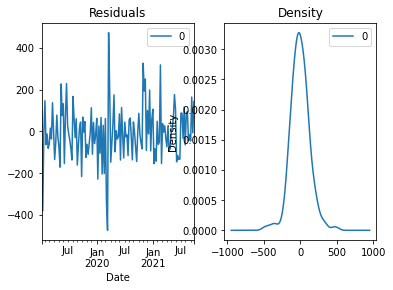

In [29]:
residuals = pd.DataFrame(model1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

<AxesSubplot:xlabel='Date'>

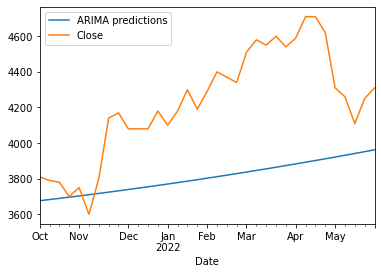

In [30]:
start=len(train)
end=len(train)+len(test)-1

pred=model1.predict(start=start,end=end,typ='levels', dynamic=False).rename('ARIMA predictions')
#pred.index=index_future_dates
pred.plot(legend=True)
test['Close'].plot(legend=True)

In [31]:
pred

2021-10-05    3676.423776
2021-10-12    3682.960409
2021-10-19    3689.609899
2021-10-26    3696.372245
2021-11-02    3703.247447
2021-11-09    3710.235506
2021-11-16    3717.336421
2021-11-23    3724.550193
2021-11-30    3731.876821
2021-12-07    3739.316306
2021-12-14    3746.868647
2021-12-21    3754.533844
2021-12-28    3762.311899
2022-01-04    3770.202809
2022-01-11    3778.206576
2022-01-18    3786.323200
2022-01-25    3794.552680
2022-02-01    3802.895016
2022-02-08    3811.350209
2022-02-15    3819.918259
2022-02-22    3828.599165
2022-03-01    3837.392927
2022-03-08    3846.299546
2022-03-15    3855.319022
2022-03-22    3864.451353
2022-03-29    3873.696542
2022-04-05    3883.054587
2022-04-12    3892.525488
2022-04-19    3902.109246
2022-04-26    3911.805860
2022-05-03    3921.615331
2022-05-10    3931.537658
2022-05-17    3941.572841
2022-05-24    3951.720882
2022-05-31    3961.981778
Freq: W-TUE, Name: ARIMA predictions, dtype: float64

In [32]:
from sklearn.metrics import mean_absolute_percentage_error
mae = mean_absolute_percentage_error(test['Close'], pred)
print('MAPE: %f' % mae)

MAPE: 0.096141


In [33]:
from statsmodels.tsa.arima_model import ARIMA
data = df['Close'].dropna()
model = ARIMA(data, order=(0,2,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D2.Close   No. Observations:                  177
Model:                 ARIMA(0, 2, 1)   Log Likelihood               -1107.257
Method:                       css-mle   S.D. of innovations            124.231
Date:                Wed, 08 Mar 2023   AIC                           2220.515
Time:                        11:20:35   BIC                           2230.043
Sample:                    01-15-2019   HQIC                          2224.379
                         - 05-31-2022                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1430      0.181      0.789      0.430      -0.212       0.498
ma.L1.D2.Close    -0.9999      0.018    -56.667      0.000      -1.035      -0.965
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

In [34]:
start=179
end=200
forecast = model.predict(start = start, end = end , typ = 'levels').rename('Forecast')





2022-06-07    4325.583594
2022-06-14    4341.310177
2022-06-21    4357.179749
2022-06-28    4373.192311
2022-07-05    4389.347862
2022-07-12    4405.646402
2022-07-19    4422.087932
2022-07-26    4438.672451
2022-08-02    4455.399959
2022-08-09    4472.270456
2022-08-16    4489.283943
2022-08-23    4506.440419
2022-08-30    4523.739885
2022-09-06    4541.182339
2022-09-13    4558.767783
2022-09-20    4576.496216
2022-09-27    4594.367639
2022-10-04    4612.382051
2022-10-11    4630.539452
2022-10-18    4648.839842
2022-10-25    4667.283222
2022-11-01    4685.869591
Freq: W-TUE, Name: Forecast, dtype: float64

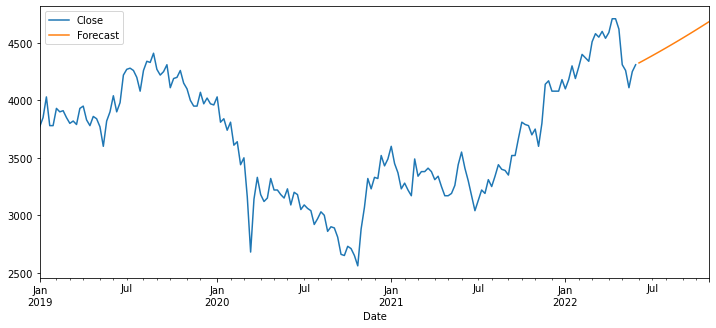

In [35]:
df['Close'].plot(figsize = (12, 5), legend = True) 

forecast.plot(legend = True)


forecast